In [1]:
# !pip install miniSom
# Link do chat gpt https://chat.openai.com/share/f18a0505-9e88-437d-9f5f-a0ea85f0ab26

Defaulting to user installation because normal site-packages is not writeable
  Using cached MiniSom-2.3.1-py3-none-any.whl


In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
np.set_printoptions(suppress=True)

# Dataset de exemplo (substitua pelos seus próprios dados)
data = np.array([
    [1, 45, 0, 0, 1, 25.2, 6.7, 120, 1],
    [0, 52, 1, 0, 0, 29.1, 7.2, 140, 1],
    [1, 32, 0, 1, 0, 31.7, 5.9, 95, 0],
    [0, 55, 1, 1, 1, 26.3, 7.8, 180, 1],
    [0, 60, 1, 0, 0, 28.6, 7.0, 115, 0],
    [1, 38, 0, 0, 1, 23.4, 6.2, 100, 0],
])

# Normalização dos dados
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data[:, :-1])

# Configurações do SOM
input_shape = normalized_data.shape[1]
output_shape = (10, 10)
num_epochs = 100

# Criação e treinamento do SOM
som = MiniSom(output_shape[0], output_shape[1], input_shape, sigma=1.0, learning_rate=0.5)
som.random_weights_init(normalized_data)
som.train_random(normalized_data, num_epochs)

# Criação do mapeamento de rótulos
labels_map = som.labels_map(normalized_data, data[:, -1])

# Classificação dos pacientes
predicted_labels = []
for sample in normalized_data:
    winner = som.winner(sample)
    predicted_label = dict(labels_map)[winner][1] #labels_map[winner[0]][winner[1]][0]
    predicted_labels.append(predicted_label)

# Resultados
print("Classificação dos pacientes:")
for i, label in enumerate(predicted_labels):
    print(f"Paciente {i+1}: {'Diabético' if label == 1 else 'Não Diabético'}")

Classificação dos pacientes:
Paciente 1: Diabético
Paciente 2: Diabético
Paciente 3: Não Diabético
Paciente 4: Diabético
Paciente 5: Não Diabético
Paciente 6: Não Diabético


In [2]:
# Leitura dos dados do "new_diabetes.csv"
data = []
with open("data.txt", "r") as text:
    for line in text:
        data.append(list(map(float, line.replace("\n", "").split(","))))
data = np.array(data)
data = data[:, 1:]

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame(data)

In [5]:
no = df[df[8] == 0.0].sample(9000)

In [6]:
yes = df[df[8] == 1.0]

In [7]:
dft = pd.concat([no, yes])

In [8]:
data = dft.to_numpy()

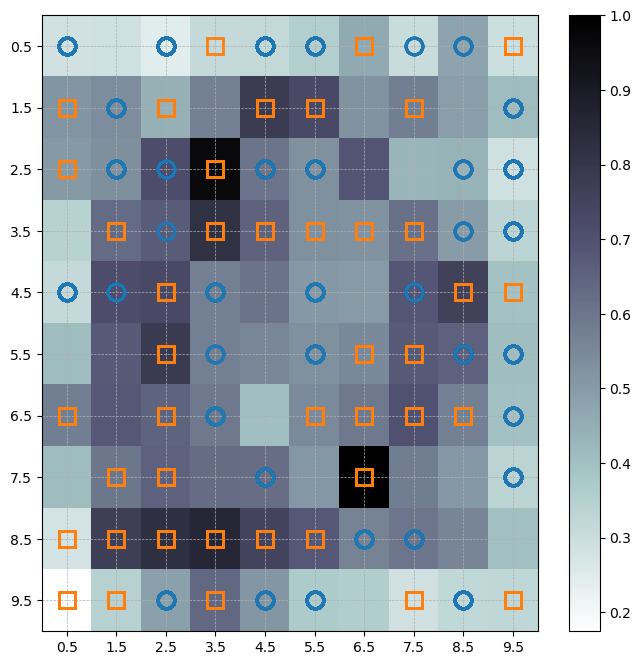

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from collections import Counter

def plot_som(som, data, labels=None):
    plt.figure(figsize=(8, 8))
    plt.pcolor(som.distance_map().T, cmap='bone_r')

    if labels is not None:
        markers = ['o', 's']
        colors = ['C0', 'C1']
        for i, (x, l) in enumerate(zip(data, labels)):
            w = som.winner(x)
            # print(i, x, l)
            plt.plot(w[0] + 0.5, w[1] + 0.5, markers[l], markerfacecolor='None',
                     markeredgecolor=colors[l], markersize=12, markeredgewidth=2)

    plt.xticks(np.arange(0.5, som.get_weights().shape[0] + 0.5, 1))
    plt.yticks(np.arange(0.5, som.get_weights().shape[1] + 0.5, 1))
    plt.xlim([0, som.get_weights().shape[0]])
    plt.ylim([0, som.get_weights().shape[1]])
    plt.gca().invert_yaxis()
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.colorbar()
    plt.show()

# Dataset de exemplo (substitua pelos seus próprios dados)
# data = np.array([
#     [1, 45, 0, 0, 1, 25.2, 6.7, 120, 1],
#     [0, 52, 1, 0, 0, 29.1, 7.2, 140, 1],
#     [1, 32, 0, 1, 0, 31.7, 5.9, 95, 0],
#     [0, 55, 1, 1, 1, 26.3, 7.8, 180, 1],
#     [0, 60, 1, 0, 0, 28.6, 7.0, 115, 0],
#     [1, 38, 0, 0, 1, 23.4, 6.2, 100, 0],
# ])

# Normalização dos dados
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data[:, :-1])

# Configurações do SOM
input_shape = normalized_data.shape[1]
output_shape = (10, 10)
num_epochs = 100

# Criação e treinamento do SOM
som = MiniSom(output_shape[0], output_shape[1], input_shape, sigma=1.0, learning_rate=0.5)
som.random_weights_init(normalized_data)
som.train_random(normalized_data, num_epochs)

# Plot do SOM antes da classificação
# plot_som(som, normalized_data)

labels_map = som.labels_map(normalized_data, data[:, -1])

# Classificação dos pacientes
predicted_labels = []
for sample in normalized_data:
    winner = som.winner(sample)
    predicted_label = int(dict(labels_map)[winner].most_common(1)[0][0]) # Pega a maior contagem de labels prescritos
    predicted_labels.append(predicted_label)

# Plot do SOM depois da classificação
plot_som(som, normalized_data, predicted_labels)


In [1]:
labels_map

NameError: name 'labels_map' is not defined

In [12]:
Counter(predicted_labels)

Counter({0: 8399, 1: 9101})

In [13]:
Counter(data[:, -1])

Counter({0.0: 9000, 1.0: 8500})

In [14]:
# Dados desbalanceados gerando muitos erros
Counter(predicted_labels == data[:, -1])

Counter({True: 14255, False: 3245})

In [15]:
14520 / (14520 + 2980) # Acuracia na mão pq sou pobre

0.8297142857142857